# Estimation et test du modèle à 5 facteurs de Fama French (2014)

En Asset Pricing, l'excès de rendement d'une action est décomposé de la façon suivante :

$$
R_{it}-RF_{t} = \alpha_{i} +\sum_{j=1}^{k} \beta_{i}^{j} f_{jt} + e_{it}
$$
où
- $R_{it}$ est le rendement de l'action *i* à la date *t*,
- $RF_{t}$ est le taux sans risque à la date *t*,
- les $f_{it}, i=1,..,k$ sont *k* facteurs expliquant les variations communes des rendements et le risque non-diversifiable
- le $\beta_{i}^{j},j=1...,k$ est l'exposition de l'actif *i* au facteur $f_{jt}$
- $e_{it}$ est la composante spécifique à l'actif *i* représentant le risque diversifiable avec $E(e_{it})=0$

Si les facteurs sont correctement choisis, c'est-à-dire qu'ils représentent les variations des rendements anticipés, on aura $\alpha_{i}=0$

**Fama et French (1993)** (Common risk factors in the returns on stocks and bonds, Journal of Financial Economics, 33 (1) , pp. 3-56) proposent un modèle à trois facteurs afin d'analyser les rendements des actions ou des portefeuilles d'actions.
Dans le modèle à 3 facteurs, le rendement moyen d'une action est supposé être corrélé avec :

1. le rendement du portefeuille du marché corrigé du taux sans risque : $Mkt-RF$
2. la taille (*Size*) de l'entreprise mesurée par sa capitalisation boursière (nombre d'actions en circulation $\times$ prix d'une action).
    - Cet effet est mesuré par le facteur $SML_{t}$ égal à la différence de rendement d'un portefeuille de petites entreprises moins celui d'un portefeuille de grandes entreprises.
3. le book to market ratio *B/M* (ratio de la valeur comptable et de la valeur de marché). Une entreprise ayant un ratio B/M elevé sera plutôt sous-évaluée et on s'attend à ce qu'elle ait ura un taux de rendement élevé.
    - Cet effet est mesuré par le facteur $HML_{t}$ calculé comme la difference de rendements entre des portefeuilles à haut (high)
et faible (Low) ratio B/M

Ces trois facteurs ne permettent pas d'expliquer totalement les variations des rendements anticipés.  **Fama et French (2015)** ('A five-factor asset pricing model', Journal of Financial Economics, 116 1-22) ajoutent deux facteurs supplémentaires prenant en compte :

4. la profitabilité anticipée des entreprises : des gains anticipés plus élevés ont tendance à augmenter le taux de rendement (toutes choses égales par ailleurs). Le facteur $RMW_{t}$ est la différence de rendement entre un portefeuille d'entreprises à forte (robust) et faible (weak) rentabilité.
5. les investissements anticipés des entreprises : des investissements plus élevés ont tendance à réduire le taux de rendement (moins de dividendes donc une valeur de marché plus petite).  Le facteur $CMA_{t}$ est la différence entre un portefeuille d'entreprises à faible nivea d'investissement (conservative) et d'entreprises à fort niveau d'investissement (agressive)

L'objectif de cette fiche va être d'utiliser ces facteurs pour estimer la décomposition des rendements d'un ensemble de portefeuilles d'action du NYSE, AMEX et Nasdaq.
On vérifiera dans quelle mesure ces facteurs expliquent correctement les rendements anticipés

    
Les données se trouvent sur le site de Kenneth French
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
    
    
**Dans les parties III et IV, les estimations devront être faites sur la période 1963-07-01 à 2023-07-01**


**Vous pouvez ajouter vos réponses (codes, affichage et commentaires des résultats) directement dans le notebook. Vous le sauvergarder avec votre nom.**
    


## I. Les 5 facteurs de Fama-French


### 1. Importation des données


In [12]:
from google.colab import files
uploaded = files.upload() #on importe le fichier dans Google Collab

Saving F-F_Research_Data_5_Factors_2x3.csv to F-F_Research_Data_5_Factors_2x3 (1).csv


In [13]:
import pandas as pd
import numpy as np

#lecture du fichier
data = pd.read_csv('F-F_Research_Data_5_Factors_2x3.csv', skiprows=3)
print(data)

    Unnamed: 0    Mkt-RF       SMB       HML       RMW       CMA        RF
0       196307     -0.39     -0.41     -0.97      0.68     -1.18      0.27
1       196308      5.07     -0.80      1.80      0.36     -0.35      0.25
2       196309     -1.57     -0.52      0.13     -0.71      0.29      0.27
3       196310      2.53     -1.39     -0.10      2.80     -2.01      0.29
4       196311     -0.85     -0.88      1.75     -0.51      2.24      0.27
..         ...       ...       ...       ...       ...       ...       ...
779       2018     -6.95     -5.09     -9.67     -1.38      0.06      1.83
780       2019     28.28     -6.16    -10.46      4.32     -3.06      2.15
781       2020     23.66      3.42    -46.67     -5.22    -11.50      0.45
782       2021     23.56     -1.21     25.49     26.69     11.98      0.04
783       2022    -21.60     -1.61     25.81      6.67     22.43      1.43

[784 rows x 7 columns]


Nous remarquons que le dataframe est composé de deux types de données : les données mensuelles et les données annuelles. Nous ferons la distinction dans le reste de notre travail.

### 2. Vérification de l'existence de variables manquantes

Vérifiez l'existence de variables manquantes

In [14]:
valeurs_manquantes = data.isnull().sum()
print(valeurs_manquantes)
data = data.dropna()
print(data)

Unnamed: 0    1
Mkt-RF        1
SMB           1
HML           1
RMW           1
CMA           1
RF            1
dtype: int64
    Unnamed: 0    Mkt-RF       SMB       HML       RMW       CMA        RF
0       196307     -0.39     -0.41     -0.97      0.68     -1.18      0.27
1       196308      5.07     -0.80      1.80      0.36     -0.35      0.25
2       196309     -1.57     -0.52      0.13     -0.71      0.29      0.27
3       196310      2.53     -1.39     -0.10      2.80     -2.01      0.29
4       196311     -0.85     -0.88      1.75     -0.51      2.24      0.27
..         ...       ...       ...       ...       ...       ...       ...
779       2018     -6.95     -5.09     -9.67     -1.38      0.06      1.83
780       2019     28.28     -6.16    -10.46      4.32     -3.06      2.15
781       2020     23.66      3.42    -46.67     -5.22    -11.50      0.45
782       2021     23.56     -1.21     25.49     26.69     11.98      0.04
783       2022    -21.60     -1.61     25.81      

Il y a une variable manquante par facteur. Nous le prenons en compte dans la fonction suivante.


### 3. Formatage des dates


On renomme la colonne Date

In [15]:
data = data.rename(columns={data.columns[0]: 'date'})

On convertie les dates au bon format

In [16]:
import pandas as pd


# on crée une fonction de convertion pour gérer tous les cas
def conv_date(date):
    if pd.notna(date):  #on vérifie si la date n'est pas vide
        date_str = str(date).strip() #On supprime les espaces en trop comme pour "  1864"
        if len(date_str) == 6:  # si le format est "yyyymm"
            return pd.to_datetime(date_str, format='%Y%m').strftime('%d-%m-%Y')
        elif len(date_str) == 4:  #si le format est "yyyy"
            return pd.to_datetime(date_str, format='%Y').strftime('%d-%m-%Y')
        else:
            return date  #si le format n'est ni "yyyymm" ni "yyyy", on ne change rien
    else:
        return date  #si la case est vide, on change rien


# on applique notre fonction à notre dataframe
data['date'] = data['date'].apply(conv_date)
print(data)



           date    Mkt-RF       SMB       HML       RMW       CMA        RF
0    01-07-1963     -0.39     -0.41     -0.97      0.68     -1.18      0.27
1    01-08-1963      5.07     -0.80      1.80      0.36     -0.35      0.25
2    01-09-1963     -1.57     -0.52      0.13     -0.71      0.29      0.27
3    01-10-1963      2.53     -1.39     -0.10      2.80     -2.01      0.29
4    01-11-1963     -0.85     -0.88      1.75     -0.51      2.24      0.27
..          ...       ...       ...       ...       ...       ...       ...
779  01-01-2018     -6.95     -5.09     -9.67     -1.38      0.06      1.83
780  01-01-2019     28.28     -6.16    -10.46      4.32     -3.06      2.15
781  01-01-2020     23.66      3.42    -46.67     -5.22    -11.50      0.45
782  01-01-2021     23.56     -1.21     25.49     26.69     11.98      0.04
783  01-01-2022    -21.60     -1.61     25.81      6.67     22.43      1.43

[782 rows x 7 columns]


On definie la colonne date en indice.

In [17]:
data.set_index('date', inplace=True)

### 3. DF RF


On convertie nos datas en valeurs.

In [18]:
for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF']:
    #On fait une boucle sur chaque colonne/facteur pour convertir les données au format numérique
    data[column] = pd.to_numeric(data[column], errors='coerce')

#On vérifie
print(data.dtypes)

Mkt-RF    float64
SMB       float64
HML       float64
RMW       float64
CMA       float64
RF        float64
dtype: object


Les données sont bien numériques, nous pouvons poursuivre le travail.

In [19]:
#On cree un nouveau DataFrame pour RF
data_rf = pd.DataFrame(data['RF'])

print(data_rf)

              RF
date            
01-07-1963  0.27
01-08-1963  0.25
01-09-1963  0.27
01-10-1963  0.29
01-11-1963  0.27
...          ...
01-01-2018  1.83
01-01-2019  2.15
01-01-2020  0.45
01-01-2021  0.04
01-01-2022  1.43

[782 rows x 1 columns]


### 4. Représentation graphique des facteurs

Faites la représentation graphique des facteurs

Pour des raisons de clareté et de lisibilité, nous faisons la representation graphique des facteurs en années.
Les données mensuelles sont trop nombreuses.

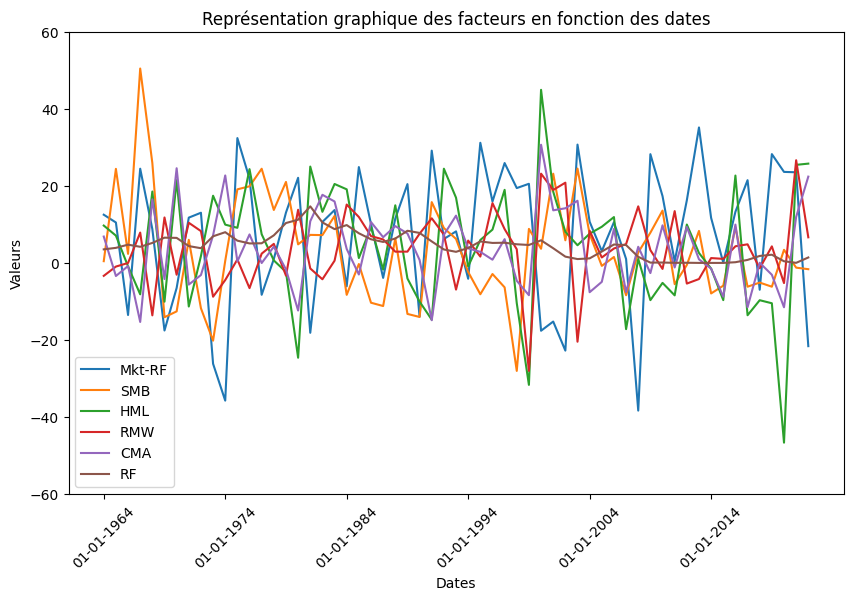

In [20]:
import matplotlib.pyplot as plt

#on commence à l'année 1964
data_subset = data.iloc[723:]

plt.figure(figsize=(10, 6))

#on ajoute une ligne pour chaque colonne de notre dataframe
for column in data_subset.columns:
    plt.plot(data_subset.index, data_subset[column], label=column)

#on ajoute des indices en abscisses et en ordonnées
plt.xticks(range(0, len(data_subset.index), 10), data_subset.index[::10], rotation=45)
plt.yticks(np.linspace(-60, 60, num=7))


#on ajoute des étiquettes et une légende
plt.xlabel('Dates')
plt.ylabel('Valeurs')
plt.title('Représentation graphique des facteurs en fonction des dates')
plt.legend()

#on affiche le graphique
plt.show()



La légendes n'affichent que 6 dates, pour des questions de lisibilité, mais elles sont toutes prises en compte.
La lecture du graphique suggère que les facteurs sont assez volatiles.

### 5. Statistiques descriptives

Calculez la moyenne, le maximum, le minimum, l'écart-type, le skewness, le kurtosis pour chaque facteur

    - pour la totalité de l'échantillon
    - par année
    - par mois

#### Pour l'ensemble de l'échantillon

In [21]:
import pandas as pd
from scipy.stats import skew, kurtosis

#on crée un dataframe pour stocker les stats
stats = pd.DataFrame(index=['mean', 'max', 'min', 'std', 'skew', 'kurtosis'])

#on calcul les statistiques pour chaque colonne de notre DF "data"
for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']:
    stats[column] = [
        data[column].mean(),    # Moyenne
        data[column].max(),     # Maximum
        data[column].min(),     # Minimum
        data[column].std(),     # Écart-type
        skew(data[column]),     # Skewness
        kurtosis(data[column])  # Kurtosis
    ]

print(stats)

             Mkt-RF        SMB        HML        RMW        CMA
mean       1.050524   0.432609   0.564808   0.535895   0.537379
max       35.200000  50.510000  44.980000  26.690000  30.710000
min      -38.340000 -28.030000 -46.670000 -28.040000 -15.310000
std        6.722234   4.742781   5.286577   3.481824   3.523488
skew       0.359458   2.209180   0.461690   0.745540   2.280190
kurtosis   7.002567  22.438320  20.148986  18.509279  16.549552


Le calcul des moments sur l'ensemble de l'échantillon ne nous parait pas pertinent puisqu'il mixte des données mensuelles et annuelles.

#### Par année

Nous recalculons les moments en utilisant les données annuelles, "par an",  afin de parvenir à des résultats plus cohérents.

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


#on selectionne les données à partir de la ligne 724 pour n'avoir que en années
data_année = data.iloc[723:]

#on calcule les statistiques comme précedemment
stats = pd.DataFrame(index=['mean', 'max', 'min', 'std', 'skew', 'kurtosis'])

for column in ['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']:
    stats[column] = [
        data_année[column].mean(),    # Moyenne
        data_année[column].max(),     # Maximum
        data_année[column].min(),     # Minimum
        data_année[column].std(),     # Écart-type
        skew(data_année[column]),     # Skewness
        kurtosis(data_année[column])  # Kurtosis
    ]

print(stats)


             Mkt-RF        SMB        HML        RMW        CMA
mean       7.111864   3.145932   4.011186   3.541186   3.760847
max       35.200000  50.510000  44.980000  26.690000  30.710000
min      -38.340000 -28.030000 -46.670000 -28.040000 -15.310000
std       17.803923  13.453799  15.860831   9.590551  10.093714
skew      -0.640915   0.679250  -0.418418  -0.401397   0.329771
kurtosis  -0.317252   1.379258   0.899443   1.494060  -0.187437


#### Par mois

Dans cette section, nous utilisons les données mensuelles, "par mois", pour calculer les moments de chaque année, pour chaque facteur.

In [23]:
import pandas as pd
from scipy.stats import skew, kurtosis

#on convertie l'index en type 'datetime'
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

#pour stocker les stats par colonne
stats_col = {}

#on boucle sur chaque colonne
for column in data.columns:
    # on utilise groupby pour regrouper les données par année jusqu'à la ligne 723
    grouped_data = data[column].iloc[:723].groupby(data.iloc[:723].index.year)

    #on calcule les statistiques pour chaque groupe (année)
    stats = grouped_data.agg(['mean', 'max', 'min', 'std', skew, kurtosis])

    # on ajoute les stats pour cette colonne à la structure de données principale
    stats_col[column] = stats

#on affiche les statistiques par colonne
for column, stats in stats_col.items():
    print(f"Stats pour {column} :\n{stats}\n")

Stats pour Mkt-RF :
          mean    max    min       std      skew  kurtosis
date                                                      
1963  1.103333   5.07  -1.57  2.509587  0.496414 -1.048053
1964  0.965833   2.69  -1.44  1.148473 -0.519687 -0.277934
1965  0.839167   3.54  -5.51  2.561141 -1.238280  1.088751
1966 -1.097500   3.86  -7.91  3.243769 -0.653623  0.007337
1967  1.835000   8.15  -4.33  3.472771 -0.188314 -0.418957
...        ...    ...    ...       ...       ...       ...
2019  2.133333   8.40  -6.94  4.019010 -0.707609  0.560945
2020  2.069167  13.65 -13.39  7.997549 -0.382813 -0.567491
2021  1.817500   6.65  -4.37  2.937847 -0.505443  0.007474
2022 -1.770833   9.57  -9.46  6.697546  0.421605 -1.182622
2023  1.064444   6.65  -5.24  4.072493  0.007009 -1.085285

[61 rows x 6 columns]

Stats pour SMB :
          mean   max   min       std      skew  kurtosis
date                                                    
1963 -1.016667 -0.41 -2.10  0.631401 -0.839846 -0.590491
1

### 6. Matrice de correlation

1. Estimez la matrice de corrélation des facteurs et commentez
2. Faites une représentation graphique de cette matrice
3. Vérifiez la significativité de la corrélation entre les facteurs $HML$ et $SMB$

#### Matrice de corrélation en utilisant les années

Nous réalisons la matrice de corrélation sur la base des données annuelles

In [24]:
from scipy.stats import pearsonr

#on calcule la matrice de corrélation
corr = data_année[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].corr()

# et on l'affiche
print("Matrice de Corrélation :\n", corr)


Matrice de Corrélation :
           Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.000000  0.215835 -0.274866 -0.207765 -0.389728
SMB     0.215835  1.000000  0.101407 -0.171307 -0.016978
HML    -0.274866  0.101407  1.000000  0.175881  0.772699
RMW    -0.207765 -0.171307  0.175881  1.000000 -0.030606
CMA    -0.389728 -0.016978  0.772699 -0.030606  1.000000


Les paires de facteurs corrélés positivement sont :
- SMB et Mkt-RF
- SMB et HML
- HML et RMW
- HML et CMA

Les paires de facteurs corrélés négativement sont :
- SMB et RMW
- SMB et CMA
- Mkt-RF et HML
- Mkt-RF et RMW
- Mkt-RF et CMA
- RMW et CMA

Sans prendre en considération la significativité des coefficients, les facteurs les plus fortement corrélés sont CMA et HML (0,77), CMA et Mky-RF (-0,39). Inversement, les moins corrélés sont CMA et SMB (-0,017) ainsi que CMA et RMW (-0,03).

**Interprétation des corrélations :**

CMA et HML (0,77) : Cette forte corrélation positive suggère que les entreprises conservatrices, c'est à dire avec une croissance des investissements plus lentes (CMA), tendent à avoir des caractéristiques d'actions de valeur (HML). Cela pourrait signifier que les entreprises avec une croissance lente/faible des actifs sont souvent celles qui sont sous-évaluées par le marché. Cela peut représenter une oppotunité d'investissement.

CMA et Mkt-RF (-0,39) : Cette corrélation négative modérée suggère que lorsque le marché global (Mkt-RF) réalise des rendements élevés par rapport au taux sans risque, les entreprises conservatrices (CMA) ne suivent pas nécessairement cette tendance. Elles pourraient avoir tendance à sous-performer le marché.

CMA et SMB (-0,017), CMA et RMW (-0,03) : Ces faibles corrélations impliquent que la croissance des actifs (CMA) n'est pas un bon indicateur de la taille (SML) ou de la rentabilité d'une entreprise (RMW).

#### Représentation graphique de la matrice de corrélation

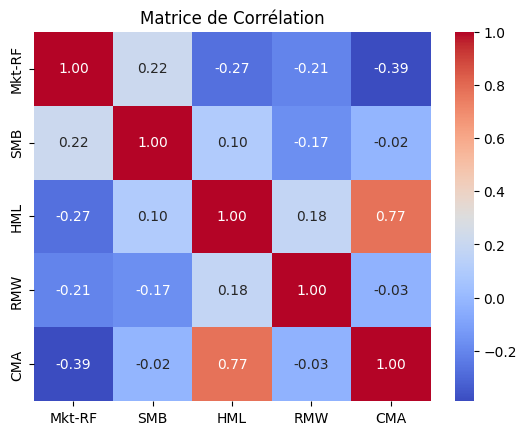

In [25]:
#on fait la représentation graphique
import seaborn as sns
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()


Les corrélations positives fortes (proche de 1) sont colorées en couleur chaude. Les corrélations négatives fortes (proche de -1) sont colorées en couleur froide.

####  Test de la significativité des corrélations

On calcule les p-values de HLM et SMB en réalisant un test de corrélation de Pearson (pearsonr). Ce dernier renvoie le coefficient de corrélation et la p-value.



In [26]:
# on calcule la corrélation entre HML et SMB
correlation, p_value = pearsonr(data_année['HML'], data_année['SMB'])

# on affiche la corrélation et la p-value
print(f"Corrélation entre HML et SMB : {correlation:.4f}")
print(f"P-value : {p_value:.4f}")

# et on conclue sur la significativité
if p_value < 0.05:
    print("La corrélation est statistiquement significative.")
else:
    print("La corrélation n'est pas statistiquement significative.")

Corrélation entre HML et SMB : 0.1014
P-value : 0.4447
La corrélation n'est pas statistiquement significative.


Comme indiqué par notre résultat, la p-value est inférieure à 0,05 ce qui implique que la corrélation n'est pas signigicative.

## II. Les 25 portefeuilles formés à partir de B/M et OP

On importe les rendements de 25 portefeuilles formés à partir des titres du NYSE, de l'AMEX, du NASDAQ pour lesquels on dispose de toutes les quotations.
Ces actions sont réparties en 25 portefeuilles obtenus par le croisement du ratio *B/M*:
- divisé en 5 catégories LoBM ou BM1/BM2/BM3/BM4/HiBM ou BM5

et de l'Operating Profitability:

- divisé en 5 catégories LoOP ou OP1/OP2/OP3/OP4/HiOP ou OP5

Ces données se trouvent dans le fichier "25_Portfolios_BEME_OP_5x5.CSV"



### 1. Importation des données

1. Importez les données
2. Transformez les dates au format yyyy-mm-01 (exemple 196307 devient 1963-07-01)
3. Transformez les dates en indices
4. Sélectionnez les observations à partir de "1963-07-01"

####Importation des données

In [27]:
from google.colab import files

# Importation du fichier dans Google Collab
uploaded = files.upload()

import pandas as pd



Saving 25_Portfolios_BEME_OP_5x5_Wout_Div.CSV to 25_Portfolios_BEME_OP_5x5_Wout_Div.CSV


In [28]:
# Lecture du fichier
data2 = pd.read_csv('25_Portfolios_BEME_OP_5x5_Wout_Div.CSV', skiprows=21, encoding='latin1', delimiter=',')
data2=data2.iloc[:-1]

print(data2)

     Unnamed: 0  LoBM LoOP    BM1 OP2    BM1 OP3    BM1 OP4  LoBM HiOP  \
0        196307     1.2623     2.3561     0.0607    -1.3786     0.5664   
1        196308     5.8711     1.9047     6.0121     5.2857     5.3890   
2        196309    -5.0591    -4.6978     1.3522    -2.0855    -1.2833   
3        196310    -2.4794    -3.7541     0.7433     3.8618     7.2150   
4        196311    -3.1730    -0.8676    -1.5319     0.5807    -3.6904   
...         ...        ...        ...        ...        ...        ...   
5929     202305     0.2619     0.2379     0.2159     0.2052     0.1014   
5930     202306     0.2770     0.2331     0.2257     0.2157     0.1018   
5931     202307     0.1993     0.0994     0.1116     0.1284     0.0383   
5932     202308     0.1989     0.0999     0.1138     0.1320     0.0380   
5933     202309     0.2096     0.1092     0.1151     0.1355     0.0378   

        BM2 OP1    BM2 OP2    BM2 OP3    BM2 OP4  ...    BM4 OP1    BM4 OP2  \
0        0.9993     1.1767     0

On renome la colonne date

In [29]:
data2 = data2.rename(columns={data2.columns[0]: 'date'})

#### Transformation des dates au format yyyy-mm-01 (exemple 196307 devient 1963-07-01)

In [30]:
import pandas as pd


# on cree une fonction de convertion pour gérer tous les cas
def conv_date(date):
    if pd.notna(date):  # on vérife si la date n'est pas vide
        # on supprime les espaces en trop comme pour "  1864"
        date_str = str(date).strip()  # on supprime les espaces en trop comme pour "  1864"
        if len(date_str) == 6:  # si le format est "yyyymm"
            return pd.to_datetime(date_str, format='%Y%m').strftime('%d-%m-%Y')
        elif len(date_str) == 4:  # si le format est "yyyy"
            return pd.to_datetime(date_str, format='%Y').strftime('%d-%m-%Y')
        else:
            return date  #si le format n'est ni "yyyymm" ni "yyyy"on change rien
    else:
        return date  #si la case est vide, on change rien


# on applique notre fonction à notre dataframe
data2['date'] = data2['date'].apply(conv_date)
print(data2)

            date  LoBM LoOP    BM1 OP2    BM1 OP3    BM1 OP4  LoBM HiOP  \
0     01-07-1963     1.2623     2.3561     0.0607    -1.3786     0.5664   
1     01-08-1963     5.8711     1.9047     6.0121     5.2857     5.3890   
2     01-09-1963    -5.0591    -4.6978     1.3522    -2.0855    -1.2833   
3     01-10-1963    -2.4794    -3.7541     0.7433     3.8618     7.2150   
4     01-11-1963    -3.1730    -0.8676    -1.5319     0.5807    -3.6904   
...          ...        ...        ...        ...        ...        ...   
5929  01-05-2023     0.2619     0.2379     0.2159     0.2052     0.1014   
5930  01-06-2023     0.2770     0.2331     0.2257     0.2157     0.1018   
5931  01-07-2023     0.1993     0.0994     0.1116     0.1284     0.0383   
5932  01-08-2023     0.1989     0.0999     0.1138     0.1320     0.0380   
5933  01-09-2023     0.2096     0.1092     0.1151     0.1355     0.0378   

        BM2 OP1    BM2 OP2    BM2 OP3    BM2 OP4  ...    BM4 OP1    BM4 OP2  \
0        0.9993     

#### Transformation des dates en indice

In [31]:
data2.set_index('date', inplace=True)

####Sélection des observations à partir de "1963-07-01"

Pour des raisons de coherence nous allons faire nos calculs sur les Average Value Weighted Returns en Monthly et en annualy. On peut dès à présent les stocker dans 2 variables

In [32]:
monthly = data2.iloc[:723]
anually= data2.iloc[1450:1509]



### 2. Calculez les excès de rendements $R_{it} -RF_{t}$

####Par mois

In [33]:
#on fusionne les deux dataset rf et rt
bis_data = monthly.merge(data_rf.iloc[:723], left_index=True, right_index=True, how='inner')

# on convertie en float
bis_data = bis_data.apply(pd.to_numeric, errors='coerce')

# on applique fonction lambda pour calculer RT - RF pour chaque ligne
returnsMonthly = bis_data.apply(lambda row: row[:-1] - row['RF'], axis=1)
print(returnsMonthly)

            LoBM LoOP  BM1 OP2  BM1 OP3  BM1 OP4  LoBM HiOP  BM2 OP1  BM2 OP2  \
date                                                                            
01-07-1963     0.9923   2.0861  -0.2093  -1.6486     0.2964   0.7293   0.9067   
01-08-1963     5.6211   1.6547   5.7621   5.0357     5.1390   0.6754   2.8666   
01-09-1963    -5.3291  -4.9678   1.0822  -2.3555    -1.5533  -2.4614  -3.7484   
01-10-1963    -2.7694  -4.0441   0.4533   3.5718     6.9250  -0.8654   1.5640   
01-11-1963    -3.4430  -1.1376  -1.8019   0.3107    -3.9604  -6.0894  -0.6804   
...               ...      ...      ...      ...        ...      ...      ...   
01-05-2023     9.7377   5.8892  -1.4359  12.4133     1.1055   8.6546  -2.3700   
01-06-2023     4.9849   7.0446   4.9773   8.3382     6.1803   2.8510   6.1592   
01-07-2023     4.4671   0.4339   1.8938   3.1363     1.0206   6.4645   1.4282   
01-08-2023    -6.2710  -1.9150   0.8050  -1.7392    -1.6577  -8.3181  -3.9498   
01-09-2023    -5.4626  -4.80

#### Par an

In [34]:
#on fusionne les deux dataset rf et rt
bis_data = anually.merge(data_rf.iloc[723:], left_index=True, right_index=True, how='inner')

# on convertie en float
bis_data = bis_data.apply(pd.to_numeric, errors='coerce')

# on applique fonction lambda pour calculer RT - RF pour chaque ligne
returnsAnnual = bis_data.apply(lambda row: row[:-1] - row['RF'], axis=1)
print(returnsAnnual)

            LoBM LoOP   BM1 OP2  BM1 OP3  BM1 OP4  LoBM HiOP  BM2 OP1  \
date                                                                    
01-01-1964     5.7736   26.4517  13.2285   5.8418    10.5789  17.4848   
01-01-1965    28.9734  -14.3287  15.7035   7.7900    13.9311  10.1163   
01-01-1966     7.2495  -32.6601 -12.0160 -14.2968   -17.4093 -25.9838   
01-01-1967    55.4304   31.3312  20.0666   7.7107    32.0857  44.6090   
01-01-1968    20.2347   -9.6831   0.0441   0.8474    -4.0425  31.6082   
01-01-1969   -35.1327  -15.7335  -0.1356  -9.1628    -2.4504 -33.5200   
01-01-1970   -45.1241  -32.5379 -26.6396 -21.2296   -17.0926 -26.0457   
01-01-1971     6.9458   24.6606  38.8081  16.0297    18.1711   2.8110   
01-01-1972     6.1177   39.9593   6.7071  19.5732    18.5738  -3.4246   
01-01-1973   -29.9423  -44.9272 -31.5469 -25.7504   -30.1150 -39.0913   
01-01-1974   -36.3854  -55.9520 -21.4543 -38.7793   -44.0783 -40.1428   
01-01-1975     7.6861   34.9739  21.6906  18.6035  

###3. Calcul de statistiques descriptives

Calculez les rendements moyens pour chaque portefeuille. Que pouvez-vous dire de la relation entre le rendement moyen et
- le *B/M* (*value effect*)  ?
- le *OP* (*profitability effect*) ?

#### Par mois

In [35]:
#on calcule les rendements moyen de chaque portefeuille
rendementmoyenM = returnsMonthly.mean()
print(rendementmoyenM)

LoBM LoOP    0.107134
BM1 OP2      0.489720
BM1 OP3      0.397750
BM1 OP4      0.400759
LoBM HiOP    0.449978
BM2 OP1      0.195108
BM2 OP2      0.289117
BM2 OP3      0.393034
BM2 OP4      0.386393
BM2 OP5      0.397535
BM3 OP1      0.097660
BM3 OP2      0.281477
BM3 OP3      0.323598
BM3 OP4      0.510650
BM3 OP5      0.597485
BM4 OP1      0.238857
BM4 OP2      0.274909
BM4 OP3      0.445377
BM4 OP4      0.429359
BM4 OP5      0.713563
HiBM LoOP    0.478896
BM5 OP2      0.485450
BM5 OP3      0.610124
BM5 OP4      0.699663
HiBM HiOP    0.666983
dtype: float64


Les actions proviennent des marchés boursiers du NYSE, de l'AMEX, et du NASDAQ.Elles sont réparties en 25 portefeuilles distincts, basés sur des combinaisons de deux critères financiers.

**Critère 1 - Ratio Book-to-Market (B/M)** :

Ce ratio est un indicateur financier utilisé pour évaluer la sur- ou sous-valorisation des actions. Il est divisé en 5 catégories, du PTF d'actions les plus sur-évaluées au PTF d'actions les plus sous évalués : LoBM (ou BM1), BM2, BM3, BM4, et HiBM (ou BM5).
Par exemple, LoBM représente des actions avec un ratio B/M bas donc d'entreprises sur évaluées.

**Critère 2 - Operating Profitability (OP)** :

L'OP mesure la capacité d'une entreprise à générer des bénéfices à partir de ses opérations courantes, autrement dit sa rentabilité. Ce critère est également divisé en 5 catégories, du PTF avec les actions des entreprises les moins rentables au plus rentables : LoOP (ou OP1), OP2, OP3, OP4, et HiOP (ou OP5).

Chaque portefeuille est formé par le croisement des catégories de B/M et OP. Par exemple, un portefeuille classé HiBM et HiOP inclue des actions d'entreprises fortement sous-évaluées et peu rentables.L'analyse de ces portefeuilles peut aider à comprendre comment différentes combinaisons de valorisation (B/M) et de rentabilité (OP) affectent les rendements des actions.

**Interpretation des relations rendements moyens mensuels /B:M:OP :**

Les rendements moyens mensuels les plus élevés sont détenus par les PTF composés d'actions BM4-OP5 (0,71), BM5-OP3 (0.610124), BM5-OP4 (0.699663) et HiBM-HiOP (0.666983).

- BM4-OP5 : Un PTF composé d'actions avec un ratio B/M élevé, signe d'entreprise sous-évaluée, et un ratio OP élevé, signe d'entreprises rentables, permet d'obtenir un rendement mensuel plus élevé que les autres combinaisons. Cela nous semble plutôt cohérent : il s'agit d'une opportunité d'investissement permettant d'investir des entreprises qui génèrent efficacement des bénéfices mais qui ne sont pas encore justement évaluées par le marché. Il en va de même pour les autres combinaisons.

Les rendements moyens mensuels les moins élevés sont détenus par les PTF composés d'actions BM3-OP1(0.097660) ; LoBM LoOP (0.107134) et BM2-OP1 (0.195108).

- BM3-OP1 : Un PTF composé d'action avec un ratio B/M élevé, signe d'entreprise sous-évaluée, et un ratio OP faible, signe d'entreprises peu rentables, offre un rendement moyen nettement plus faible que les autres combinaisons. Cela nous semble plutôt cohérent. Il en va de même pour LoBM LoOP et BM2-OP1 (sur-évaluation et peu de rentabilité). On note qu'il est préférable d'investir dans les actions d'une entreprise sur évaluée, avec de faible rendements que dans une entreprise sous évaluée, avec des rendements encore plus faibles.

**Conclusion:** Les meilleures opportunités d'investissement résident dans les PTF d'actions d'entreprises surévaluées et fortement rentables.

#### Par an

In [36]:
#on calcule les rendements moyen de chaque portefeuille
rendementmoyenA = returnsAnnual.mean()
print(rendementmoyenA)

LoBM LoOP    2.393785
BM1 OP2      7.930515
BM1 OP3      5.325200
BM1 OP4      4.502102
LoBM HiOP    5.717031
BM2 OP1      3.013212
BM2 OP2      3.697275
BM2 OP3      4.629892
BM2 OP4      4.804661
BM2 OP5      4.826661
BM3 OP1      1.419656
BM3 OP2      3.366756
BM3 OP3      4.364549
BM3 OP4      6.239900
BM3 OP5      7.514876
BM4 OP1      3.228429
BM4 OP2      3.695661
BM4 OP3      5.746934
BM4 OP4      5.590878
BM4 OP5      9.487058
HiBM LoOP    6.387695
BM5 OP2      6.586963
BM5 OP3      8.712875
BM5 OP4      9.813532
HiBM HiOP    9.576219
dtype: float64


Nous arrivons à des résultats assez similaires avec une exception surprenante. BM1-OP1 détient un rendement moyen annuel très elevé relativement aux autres combinaisons, alors qu'il ne comptait pas parmis les meilleurs au niveau mensuel. Une entreprise sur-évaluée et peu rentable peut permettre d'obtenir un rendement annuel parmis les plus important. Ce résultat est contre-intuitif.

## III. Estimation du modèle à facteurs


Pour chaque actif *i*, on dispose de T observations ${r_{i1},...,r_{iT}}$. On peut estimer les trois régressions suivantes : :
    
### Régression sur le facteur du marché
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+e_{it}$$

### Régression sur les 3 facteurs
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{t}+e_{it}$$

### Régression sur les 5 facteurs
$$ R_{it} - R_{Ft} = \alpha_{i}+\beta_{i}(R_{MT}-R_{Ft})+s_{i}SMB_{t}+h_{i}HML_{t}+r_{i}RMW_{t}+c_{i}CMA_{t}+e_{it}$$

- $R_{Ft}$ est le taux sans risque
- $R_{MT}$ est le taux de rendement du portefeuille du marché
- Le résidu $e_{it}$ représente le risque idiosyncratique (ou risque diversifiable) de chaque actif.
- $\beta_{i}, s_{i}, h_{i},r_{i}, c_{i}$ représentent les expositions à chacun des facteurs
- $\alpha_{i}$ est la constante. Selon la théorie des portefeuilles efficients, on s'attend à avoir $a_{i}=0$. Cette hypothèse peut aussi se justifier par la proposition que l'ensemble des facteurs représentent la totalité des facteurs de risque.



### 1. Construction de fonction :

1. les coefficients estimés
2. les tstat des coefficients estimés
3. les résidus des régressions
4. La moyenne des constantes en valeur absolue

#### Initialisation de la fonction

In [37]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def regression_lineaire(x, y, smbt=None, hmlt=None, rmwt=None, cmat=None):
    X = [x.values] # on construie la matrice de conception X

    #si elles existent on ajoute les variables explicatives et on les convertie en float
    if smbt is not None:
        X.append(pd.to_numeric(smbt, errors='coerce'))
    if hmlt is not None:
        X.append(pd.to_numeric(hmlt, errors='coerce'))
    if rmwt is not None:
        X.append(pd.to_numeric(rmwt, errors='coerce'))
    if cmat is not None:
        X.append(pd.to_numeric(cmat, errors='coerce'))

    X = np.column_stack(X)   # on effectue la contenation des tableaux

    X = sm.add_constant(X) # on ajoute la constante

    modele = sm.OLS(y, X).fit() # on fit le modele

    #on extrait la constante (qui est notre alpha) et notre beta
    alpha = modele.params[0]
    beta = modele.params[1]

    coefficients = [alpha, beta] #on ajoute alpha et beta à notre liste de coeffcients
    t_stats = [modele.tvalues[0], modele.tvalues[1]] #on ajoute les t-sats de alpha et beta

    #si ils existent on ajoute les coefficients et les t-stats de nos autres facteurs
    for i in range(2, len(modele.params)):
        coefficients.append(modele.params[i])
        t_stats.append(modele.tvalues[i])

    residus = modele.resid # on extrait les résidus


    #on stocke les résultats dans 2 dataframes : un pour les coeff et un pour les résidus, en s'assurant d'afficher seulement les facteurs qui sont présents
    resultats_df = pd.DataFrame({
        'Variable': ['Alpha', 'Beta'] + (['Gamma_SMBT', 'Gamma_HMLT'] if X.shape[1] == 4 else ['Gamma_SMBT', 'Gamma_HMLT', 'Gamma_RMWT', 'Gamma_CMAT'] if X.shape[1] == 6 else []),
        'Coefficients': coefficients,
        'T-Stats': t_stats,
    })
    res= pd.DataFrame({'Résidus': residus})

    return resultats_df, res






#### Regression sur le facteur de marché

In [38]:
import pandas as pd

coefficients1 = [] #on crée une liste pour stocker tous les coefficients alpha
resultats_par_colonne1 = {} #on crée un dictionnaire pour stocker les résultats par portefeeuille
residus_par_colonne1 = {} #on crée un dictionnaire pour stocker les résidus par portefeuille

#on boucle à travers chaque colone (chaque portefeuille) de returnsMonthly (cad les excès de rendements en mois)
for col in returnsMonthly.columns:
    y = returnsMonthly[col] # y est l'excès de rendement
    x = data['Mkt-RF'].iloc[0:723]# x est est le taux de rendement du portefeuille du marché corrigé du taux sans risque (seulement pour les mois)

    #on appelle la fonction regression_lineaire pour chaque colonne
    resultats_colonne, residus_colonne = regression_lineaire(x, y)

    #on ajoute le coefficient alpha du portefeuille à la liste
    coefficients1.append(resultats_colonne.loc[resultats_colonne['Variable'] == 'Alpha', 'Coefficients'].values[0])

    #on stocke le DataFrame résultant de la régression et contenant les statistiques dans le dictionnaire
    resultats_par_colonne1[col] = resultats_colonne

    #on stocke les résidus dans le dictionnaire correspondant
    residus_par_colonne1[col] = residus_colonne

#on peut maintenant pour chaque portefeuille afficher les statistiques et les résidus
for col, df in resultats_par_colonne1.items():
    print(f"\nRésultats pour le portefeuille '{col}':\n")
    print(df) #stats

    print(f"Résidus pour le portefeuille '{col}':\n")
    print(residus_par_colonne1[col]) #résidus

# on calcule la moyenne de tous les coefficients alpha pour la qst suivante
moyenne_alpha1 = abs(sum(coefficients1) / len(coefficients1))

print(f"\nMoyenne des coefficients alpha : {moyenne_alpha1}")





Résultats pour le portefeuille 'LoBM LoOP':

  Variable  Coefficients    T-Stats
0    Alpha     -0.693197  -3.854788
1     Beta      1.439724  36.206167
Résidus pour le portefeuille 'LoBM LoOP':

             Résidus
date                
01-07-1963  2.246989
01-08-1963 -0.985105
01-09-1963 -2.375536
01-10-1963 -5.718705
01-11-1963 -1.526037
...              ...
01-05-2023  9.926994
01-06-2023 -3.622521
01-07-2023  0.538782
01-08-2023 -2.136862
01-09-2023  2.774752

[723 rows x 1 columns]

Résultats pour le portefeuille 'BM1 OP2':

  Variable  Coefficients    T-Stats
0    Alpha     -0.218965  -1.595828
1     Beta      1.274860  42.017812
Résidus pour le portefeuille 'BM1 OP2':

             Résidus
date                
01-07-1963  2.802260
01-08-1963 -4.589874
01-09-1963 -2.747305
01-10-1963 -7.050530
01-11-1963  0.164996
...              ...
01-05-2023  5.661964
01-06-2023 -0.972029
01-07-2023 -3.439435
01-08-2023  1.350880
01-09-2023  2.098130

[723 rows x 1 columns]

Résultats pour 

#### Regression sur le facteur de marché, SMB et HML

In [39]:
import pandas as pd

coefficients2 = [] # on crée une liste pour stocker tous les coefficients alpha
resultats_par_colonne2 = {} # on crée un dictionnaire pour stocker les résultats par portefeuille
residus_par_colonne2 = {} #on crée un dictionnaire pour stocker les résidus par portefeuille

#on boucle à travers chaque colone (chaque portefeuille) de returnsMonthly (cad les excès de rendements en mois)
for col in returnsMonthly.columns:
    y = returnsMonthly[col]
    x = data['Mkt-RF'].iloc[0:723]

    #on appelle la fonction regression_lineaire pour chaque colonne
    resultats_colonne2, residus_colonne2 = regression_lineaire(x,y,data['SMB'].iloc[:723],data['HML'].iloc[:723])

   #on ajoute le coefficient alpha du portefeuille à la liste
    coefficients2.append(resultats_colonne2.loc[resultats_colonne2['Variable'] == 'Alpha', 'Coefficients'].values[0])

    #on stocke le DataFrame résultant de la régression et contenant les statistiques dans le dictionnaire
    resultats_par_colonne2[col] = resultats_colonne2

    #on stocke les résidus dans le dictionnaire correspondant
    residus_par_colonne2[col] = residus_colonne2

#on peut maintenant afficher les statistiques et les résidus pour chaque portefeuille
for col, df in resultats_par_colonne2.items():
    print(f"\nRésultats pour le portefeuille '{col}':\n")
    print(df)#stats
    print(f"Résidus pour le portefeuille '{col}':\n")
    print(residus_par_colonne2[col])#résidus

# on calcule la moyenne de tous les coefficients alpha pour la qst suivante
moyenne_alpha2 = abs(sum(coefficients2) / len(coefficients2))
print(f"\nMoyenne des coefficients alpha : {moyenne_alpha2}")





Résultats pour le portefeuille 'LoBM LoOP':

     Variable  Coefficients    T-Stats
0       Alpha     -0.455387  -3.167916
1        Beta      1.210678  35.997720
2  Gamma_SMBT      0.596762  12.213961
3  Gamma_HMLT     -0.834064 -17.230798
Résidus pour le portefeuille 'LoBM LoOP':

             Résidus
date                
01-07-1963  1.355482
01-08-1963  1.917075
01-09-1963 -2.554204
01-10-1963 -4.630936
01-11-1963  0.026227
...              ...
01-05-2023  3.557142
01-06-2023 -3.397210
01-07-2023  2.757478
01-08-2023 -1.628021
01-09-2023  3.672722

[723 rows x 1 columns]

Résultats pour le portefeuille 'BM1 OP2':

     Variable  Coefficients    T-Stats
0       Alpha     -0.053914  -0.431487
1        Beta      1.167154  39.925086
2  Gamma_SMBT      0.191155   4.501047
3  Gamma_HMLT     -0.513273 -12.199032
Résidus pour le portefeuille 'BM1 OP2':

             Résidus
date                
01-07-1963  2.175703
01-08-1963 -3.132042
01-09-1963 -2.915328
01-10-1963 -6.728707
01-11-1963  0

#### Regression sur le facteur de marché, SMB, HML, RMW et CMA

In [40]:
import pandas as pd

coefficients3 = [] # on crée une liste pour stocker tous les coefficients alpha
resultats_par_colonne3 = {} # on crée un dictionnaire pour stocker les résultats par portefeuille
residus_par_colonne3 = {} #on crée un dictionnaire pour stocker les résidus par portefeuille

#on boucle à travers chaque colone (chaque portefeuille) de returnsMonthly (cad les excès de rendements en mois)
for col in returnsMonthly.columns:
    y = returnsMonthly[col]
    x = data['Mkt-RF'].iloc[0:723]

    #on appelle la fonction regression_lineaire pour chaque colonne
    resultats_colonne, residus_colonne = regression_lineaire(x,y,data['SMB'].iloc[:723],data['HML'].iloc[:723],data['RMW'].iloc[:723],data['CMA'].iloc[:723])

    #on ajoute le coefficient alpha du portefeuille à la liste
    coefficients3.append(resultats_colonne.loc[resultats_colonne['Variable'] == 'Alpha', 'Coefficients'].values[0])
    #on stock le DataFrame résultant de la régression et contenant les statistiques dans le dictionnaire
    resultats_par_colonne3[col] = resultats_colonne


    #on stocke les résidus dans le dictionnaire correspondant
    residus_par_colonne3[col] = residus_colonne

#on peut maintenant pour chaque portefeuille afficher les statistiques et les résidus
for col, df in resultats_par_colonne3.items():
    print(f"\nRésultats pour le portefeuille '{col}':\n")
    print(df) #stats

    print(f"Résidus pour le portefeuille '{col}':\n")
    print(residus_par_colonne3[col]) #résidus

# on calcule la moyenne de tous les coefficients alpha pour la qst suivante
moyenne_alpha3 = abs(sum(coefficients3) / len(coefficients3))
print(f"\nMoyenne des coefficients alpha : {moyenne_alpha3}")



Résultats pour le portefeuille 'LoBM LoOP':

     Variable  Coefficients    T-Stats
0       Alpha     -0.036371  -0.280543
1        Beta      1.122474  36.187020
2  Gamma_SMBT      0.376067   8.278820
3  Gamma_HMLT     -0.546012  -9.402201
4  Gamma_RMWT     -0.875877 -14.314396
5  Gamma_CMAT     -0.548558  -6.254156
Résidus pour le portefeuille 'LoBM LoOP':

             Résidus
date                
01-07-1963  1.039290
01-08-1963  1.373521
01-09-1963 -3.726700
01-10-1963 -3.754902
01-11-1963 -0.383995
...              ...
01-05-2023 -0.237026
01-06-2023 -1.855056
01-07-2023  1.882314
01-08-2023 -1.053868
01-09-2023  3.146706

[723 rows x 1 columns]

Résultats pour le portefeuille 'BM1 OP2':

     Variable  Coefficients    T-Stats
0       Alpha      0.025946   0.202965
1        Beta      1.153616  37.716828
2  Gamma_SMBT      0.143799   3.210383
3  Gamma_HMLT     -0.475207  -8.298653
4  Gamma_RMWT     -0.191309  -3.170754
5  Gamma_CMAT     -0.063880  -0.738604
Résidus pour le portefeu

### 2. Commentaires des estimations


Modèle sans facteurs : En moyenne, et en prenant la valeur absolue, l'Alpha est de 0.16. Cette valeur, bien que relativement proche de zéro, indique que le modèle n'est pas parfaitement aligné avec les rendements réels du marché.

Modèle avec facteurs (3 et 5): Ici aussi, l'apha est différent de 0 mais plus élévé que avec le modèle sans facteur (0,27 et 0,28) ce qui suggère que l'ajout des facteurs ne permet pas de mieux modéliser le marché mais plutot l'effet inverse.De plus on remarque que l'ajout de facteurs entre 3 et 5 a augmenté l'apha moyen ce qui prouve d'autant plus que l'ajout de facteurs reduit la précisions du modèle

#### 1. Calculez et donnez les noms des portefeuilles pour lesquels le coefficients du rendement du portefeuille du marché est
- supérieur à 1
- égal à 1
- inférieur à 1

#####  Regression sur le facteur de marché

In [41]:
import pandas as pd

# on crée un df-pour stocker les résultats
egale_df = pd.DataFrame(columns=['egale'])
inferieur_df = pd.DataFrame(columns=['inferieur'])
superieur_df = pd.DataFrame(columns=['superieur'])

# on parcourt les résultats de régression pour chaque portefeuille
for col, df in resultats_par_colonne1.items():
    beta = df[df['Variable'] == 'Beta']['Coefficients'].values[0] # on extrait le coefficient de beta pour le protefeuille actuek

    # on determine si beta est inférieur, supérieur ou égal à 1 et on stock das le data frame correspondant
    if beta < 1:
        inferieur_df = inferieur_df.append({'inferieur': col}, ignore_index=True)
    elif beta > 1:
        superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
    else:
        egale_df = egale_df.append({'egale': col}, ignore_index=True)

#on concatène les tableaux en un seul tableau final et on l'affiche
resultats_df = pd.concat([superieur_df, inferieur_df, egale_df], axis=1)
print("\nDataframe affichant si beta est superieur inferieur ou égale à 1 pour chaque portefeuille :\n")
print(resultats_df)




Dataframe affichant si beta est superieur inferieur ou égale à 1 pour chaque portefeuille :

    superieur  inferieur egale
0   LoBM LoOP  LoBM HiOP   NaN
1     BM1 OP2    BM2 OP3   NaN
2     BM1 OP3    BM2 OP4   NaN
3     BM1 OP4    BM2 OP5   NaN
4     BM2 OP1    BM3 OP2   NaN
5     BM2 OP2    BM3 OP3   NaN
6     BM3 OP1    BM3 OP4   NaN
7     BM3 OP5    BM4 OP1   NaN
8     BM4 OP5    BM4 OP2   NaN
9   HiBM LoOP    BM4 OP3   NaN
10  HiBM HiOP    BM4 OP4   NaN
11        NaN    BM5 OP2   NaN
12        NaN    BM5 OP3   NaN
13        NaN    BM5 OP4   NaN


<ipython-input-41-5e48990de43f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-41-5e48990de43f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-41-5e48990de43f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-41-5e48990de43f>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-41-5e

##### Regression sur le facteur de marché, SMB et HML

In [42]:
import pandas as pd

# on crée un df-pour stocker les résultats
egale_df = pd.DataFrame(columns=['egale'])
inferieur_df = pd.DataFrame(columns=['inferieur'])
superieur_df = pd.DataFrame(columns=['superieur'])

# on parcourt les résultats de régression pour chaque portefeuille
for col, df in resultats_par_colonne2.items():
    beta = df[df['Variable'] == 'Beta']['Coefficients'].values[0] # on extrait le coefficient de beta pour le protefeuille actuel

    # on determine si beta est inférieur, supérieur ou égal à 1 et on stocke dans le data frame correspondant
    if beta < 1:
        inferieur_df = inferieur_df.append({'inferieur': col}, ignore_index=True)
    elif beta > 1:
        superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
    else:
        egale_df = egale_df.append({'egale': col}, ignore_index=True)

#on concatène les tableaux en un seul tableau final et on l'affiche
resultats_df = pd.concat([superieur_df, inferieur_df, egale_df], axis=1)
print("\nDataframe affichant si beta est superieur inferieur ou égale à 1 pour chaque portefeuille :\n")
print(resultats_df)




Dataframe affichant si beta est superieur inferieur ou égale à 1 pour chaque portefeuille :

    superieur  inferieur egale
0   LoBM LoOP  LoBM HiOP   NaN
1     BM1 OP2    BM2 OP2   NaN
2     BM1 OP3    BM2 OP4   NaN
3     BM1 OP4    BM2 OP5   NaN
4     BM2 OP1    BM3 OP2   NaN
5     BM2 OP3    BM3 OP3   NaN
6     BM3 OP1    BM3 OP4   NaN
7     BM3 OP5    BM4 OP2   NaN
8     BM4 OP1    BM4 OP3   NaN
9     BM4 OP4        NaN   NaN
10    BM4 OP5        NaN   NaN
11  HiBM LoOP        NaN   NaN
12    BM5 OP2        NaN   NaN
13    BM5 OP3        NaN   NaN
14    BM5 OP4        NaN   NaN
15  HiBM HiOP        NaN   NaN


<ipython-input-42-30a6ab5d5a0d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-42-30a6ab5d5a0d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-42-30a6ab5d5a0d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-42-30a6ab5d5a0d>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-42-30

##### Regression sur le facteur de marché, SMB, HML, RMW et CMA

In [43]:
import pandas as pd

# on crée un df-pour stocker les résultats
egale_df = pd.DataFrame(columns=['egale'])
inferieur_df = pd.DataFrame(columns=['inferieur'])
superieur_df = pd.DataFrame(columns=['superieur'])

# on parcourt les résultats de régression pour chaque portefeuille
for col, df in resultats_par_colonne3.items():
    beta_value = df[df['Variable'] == 'Beta']['Coefficients'].values[0] # on extrait le coefficient de beta pour le protefeuille actuel

    #on détermine si beta est inférieur, supérieur ou égal à 1 et on stock das le data frame correspondant
    if beta_value < 1:
        inferieur_df = inferieur_df.append({'inferieur': col}, ignore_index=True)
    elif beta_value > 1:
        superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
    else:
        egale_df = egale_df.append({'egale': col}, ignore_index=True)

#on concatène les tableaux en un seul tableau final et on l'affiche
resultats_df = pd.concat([superieur_df, inferieur_df, egale_df], axis=1)
print("\nDataframe affichant si beta est superieur inferieur ou égale à 1 pour chaque portefeuille :\n")
print(resultats_df)



<ipython-input-43-a3b3dd9cd013>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-43-a3b3dd9cd013>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-43-a3b3dd9cd013>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-43-a3b3dd9cd013>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-43-a3


Dataframe affichant si beta est superieur inferieur ou égale à 1 pour chaque portefeuille :

    superieur  inferieur egale
0   LoBM LoOP  LoBM HiOP   NaN
1     BM1 OP2    BM2 OP5   NaN
2     BM1 OP3    BM3 OP2   NaN
3     BM1 OP4    BM3 OP3   NaN
4     BM2 OP1    BM3 OP4   NaN
5     BM2 OP2    BM4 OP2   NaN
6     BM2 OP3    BM4 OP3   NaN
7     BM2 OP4        NaN   NaN
8     BM3 OP1        NaN   NaN
9     BM3 OP5        NaN   NaN
10    BM4 OP1        NaN   NaN
11    BM4 OP4        NaN   NaN
12    BM4 OP5        NaN   NaN
13  HiBM LoOP        NaN   NaN
14    BM5 OP2        NaN   NaN
15    BM5 OP3        NaN   NaN
16    BM5 OP4        NaN   NaN
17  HiBM HiOP        NaN   NaN


<ipython-input-43-a3b3dd9cd013>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-43-a3b3dd9cd013>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inferieur_df = inferieur_df.append({'inferieur': col}, ignore_index=True)
<ipython-input-43-a3b3dd9cd013>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inferieur_df = inferieur_df.append({'inferieur': col}, ignore_index=True)
<ipython-input-43-a3b3dd9cd013>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  superieur_df = superieur_df.append({'superieur': col}, ignore_index=True)
<ipython-input-43-a3

####2. Pour chacun des facteurs HML, SMB et CMA, donnez :
    
- le nombre d'actifs pour lesquels chacun des facteurs pris un à un n'est pas significatif
- les noms des portefeuilles concernés

Quels facteurs vous paraissent ne pas avoir un pouvoir explicatif dans les variations des rendements ?
     

***Nous utilisions pour cela la derniere regression à 5 facteurs***

##### La fonction :

In [44]:
def Facteurs_NS(Gamma):
    actifs_NS = []

    for actif, resultats in resultats_par_colonne3.items():
        gamma_hmlt_t_stat = resultats.loc[resultats['Variable'] == Gamma, 'T-Stats'].values[0] # on sort la t stat de l'actif

        # on compare la t stat au soeuil significatif et on l'ajoute à la liste s'il n'est pas significatif
        if abs(gamma_hmlt_t_stat) < 1.96:
            actifs_NS.append(actif)

    # on affiche le nombre d'actifs non significatifs
    nbre_NS = len(actifs_NS)
    print(f"\nNombre d'actifs avec un {Gamma} non significatif : {nbre_NS}")

    return f"\nActifs avec un {Gamma} non significatif : {actifs_NS}"


#####Pour HML

In [45]:
actifs_NS = Facteurs_NS("Gamma_HMLT")
print(actifs_NS)


Nombre d'actifs avec un Gamma_HMLT non significatif : 1

Actifs avec un Gamma_HMLT non significatif : ['BM2 OP3']


##### Pour SMB

In [46]:
actifs_NS = Facteurs_NS("Gamma_SMBT")

print(actifs_NS)



Nombre d'actifs avec un Gamma_SMBT non significatif : 5

Actifs avec un Gamma_SMBT non significatif : ['BM2 OP2', 'BM2 OP3', 'BM2 OP4', 'BM3 OP2', 'BM3 OP3']


##### Pour CMA

In [47]:

actifs_NS = Facteurs_NS("Gamma_CMAT")

print(actifs_NS)


Nombre d'actifs avec un Gamma_CMAT non significatif : 13

Actifs avec un Gamma_CMAT non significatif : ['BM1 OP2', 'BM1 OP3', 'LoBM HiOP', 'BM2 OP1', 'BM2 OP5', 'BM3 OP1', 'BM3 OP4', 'BM4 OP1', 'BM4 OP3', 'BM4 OP4', 'HiBM LoOP', 'BM5 OP4', 'HiBM HiOP']


On voit que c'est le facteur CMA qui a le plus de portefeuiles ayant le facteur CMA non significatif, avec 13 portefeuilles. Cela fait plus de la moitié des portefeuilles. On peut aisément en déduire qu'il n'a pas de pouvoir explicatif dans la variation des rendements.

Concernant les facteurs SMB et HML, ils ne sont pas significatifs pour respectivement 5 et 1 portefeuilles. Cela represente 20% et 4% des portefeuilles. Ce qui est raisonnable. On peut aisément en déduire qu'ils ont un pouvoir explicatif dans la variation des rendements

### 3. Corrélation des résidus

1. Calculez la matrice de corrélation des résidus et faites sa visualisation graphique
2. Peut-on supposer que les corrélations des résidus sont nulles en moyenne ? Que pouvez-vous en déduire sur la capacité des cinq facteurs à expliquer les variations communes des rendements ?


####Regression sur le facteur de marché


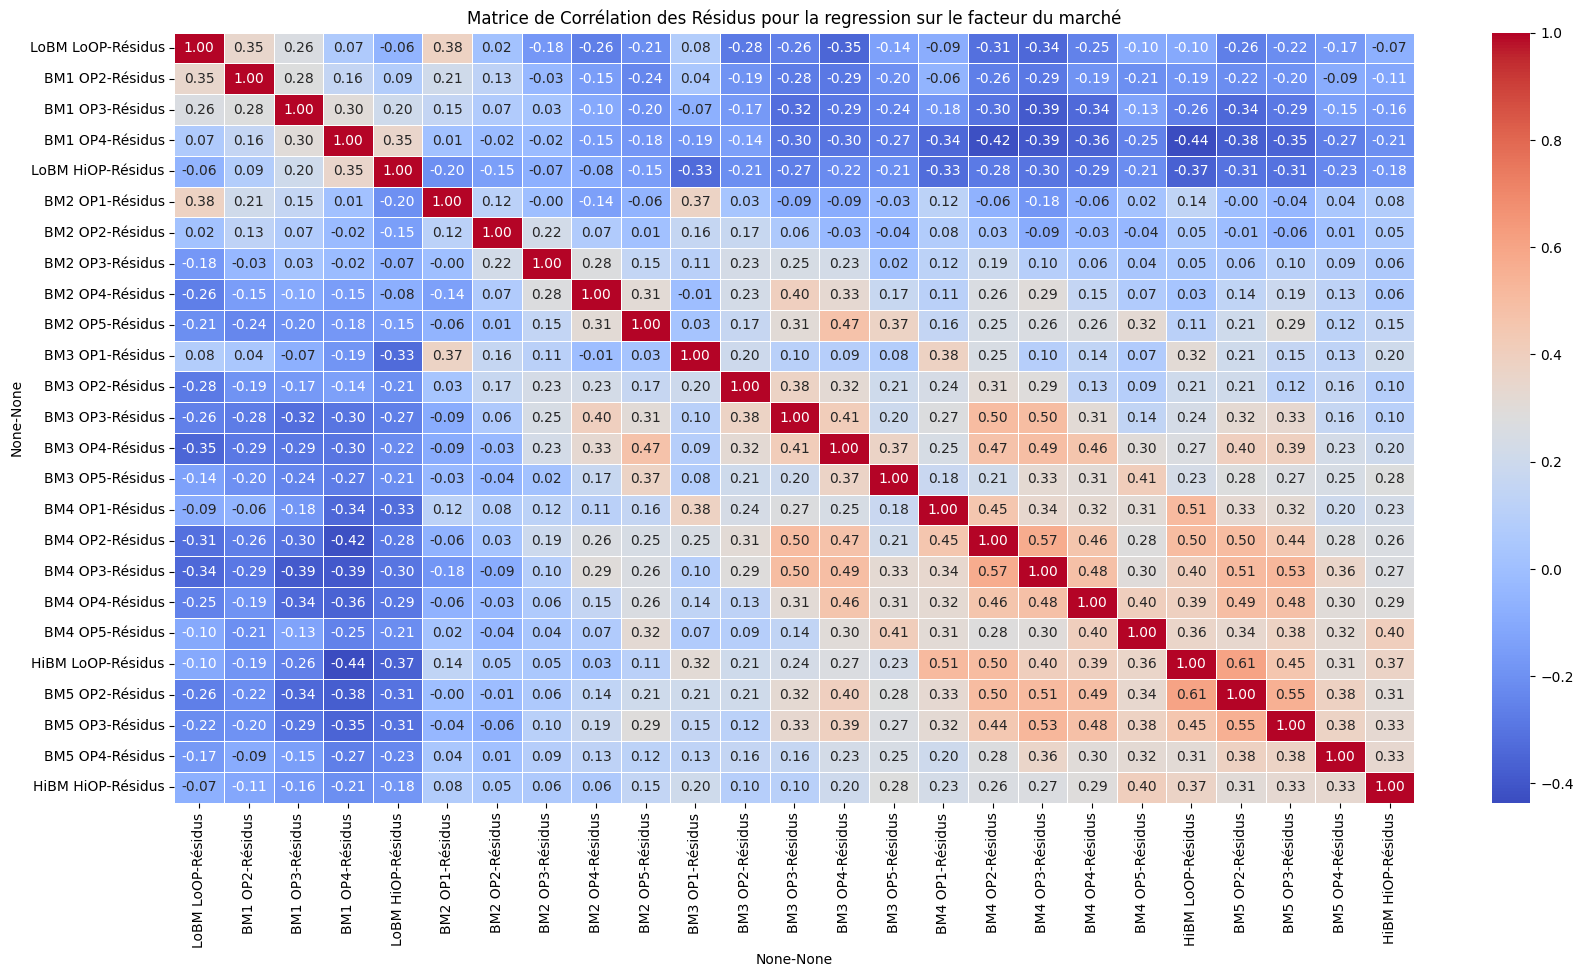

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

#on cree un DataFrame pour stocker les résidus de tous les portefeuilles
tous_les_residus_df = pd.concat(residus_par_colonne1.values(), axis=1, keys=residus_par_colonne3.keys())

#on calcule la corrélation entre les résidus
correlation_residus = tous_les_residus_df.corr()

# on affiche la matrice
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_residus, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation des Résidus pour la regression sur le facteur du marché")
plt.show()

####Regression sur le facteur de marché, SMB et HML

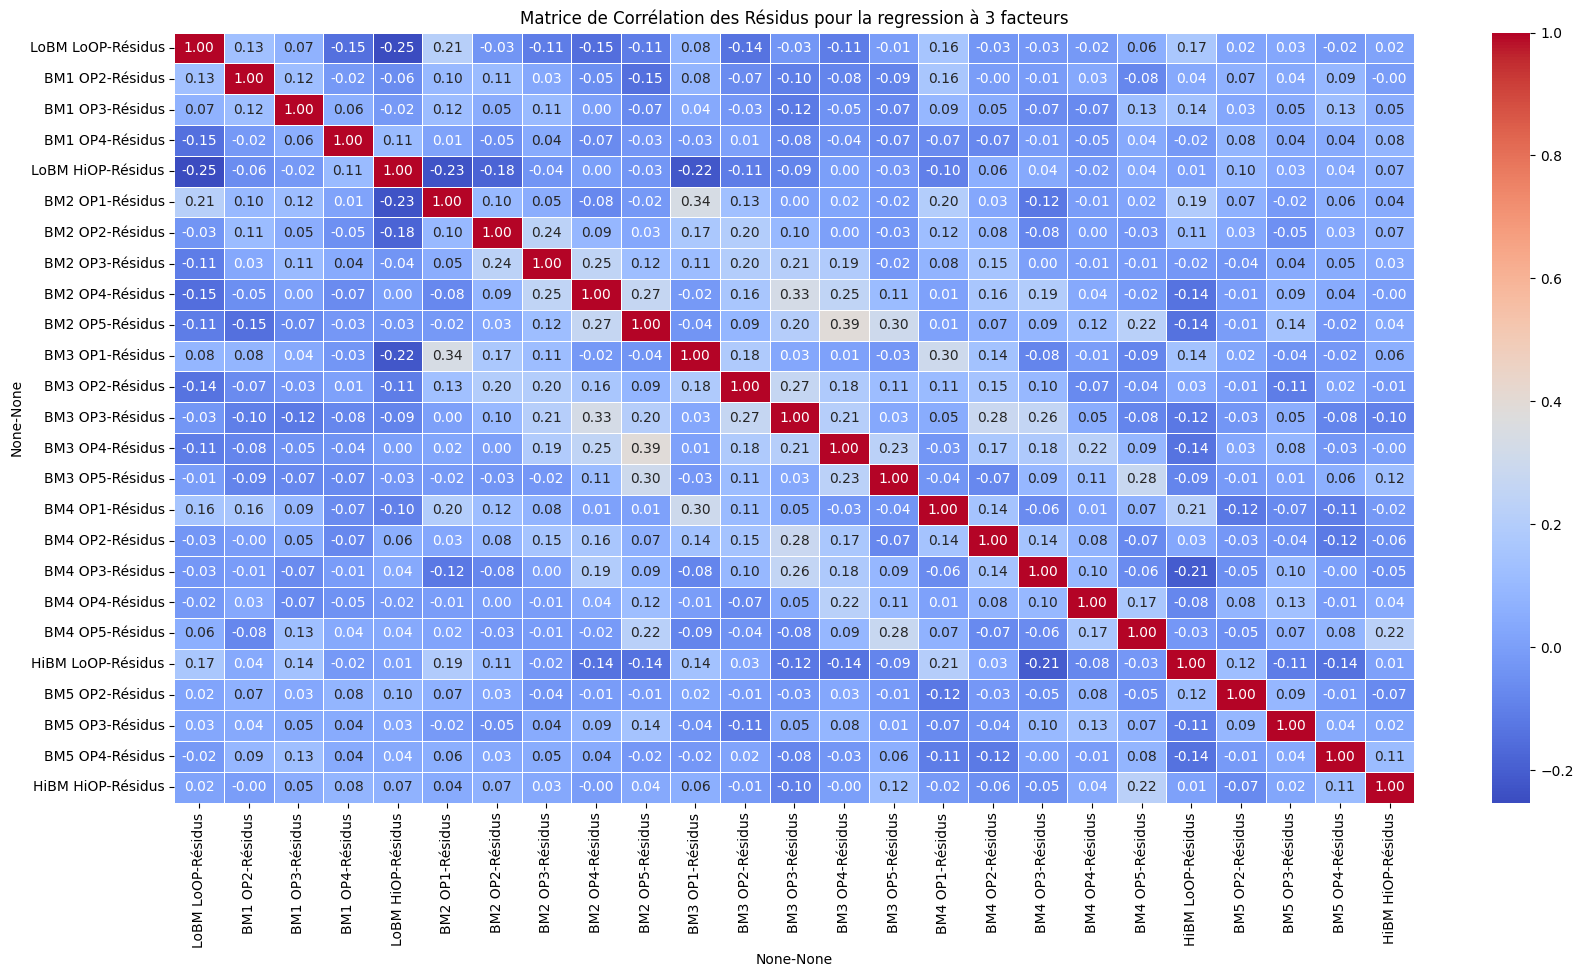

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# on crée un DataFrame pour stocker les résidus de tous les portefeuilles
tous_les_residus_df = pd.concat(residus_par_colonne2.values(), axis=1, keys=residus_par_colonne3.keys())

#on calcule la corrélation entre les résidus
correlation_residus = tous_les_residus_df.corr()

# on affiche la matrice
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_residus, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation des Résidus pour la regression à 3 facteurs")
plt.show()

####Regression sur le facteur de marché, SMB, HML, RMW et CMA

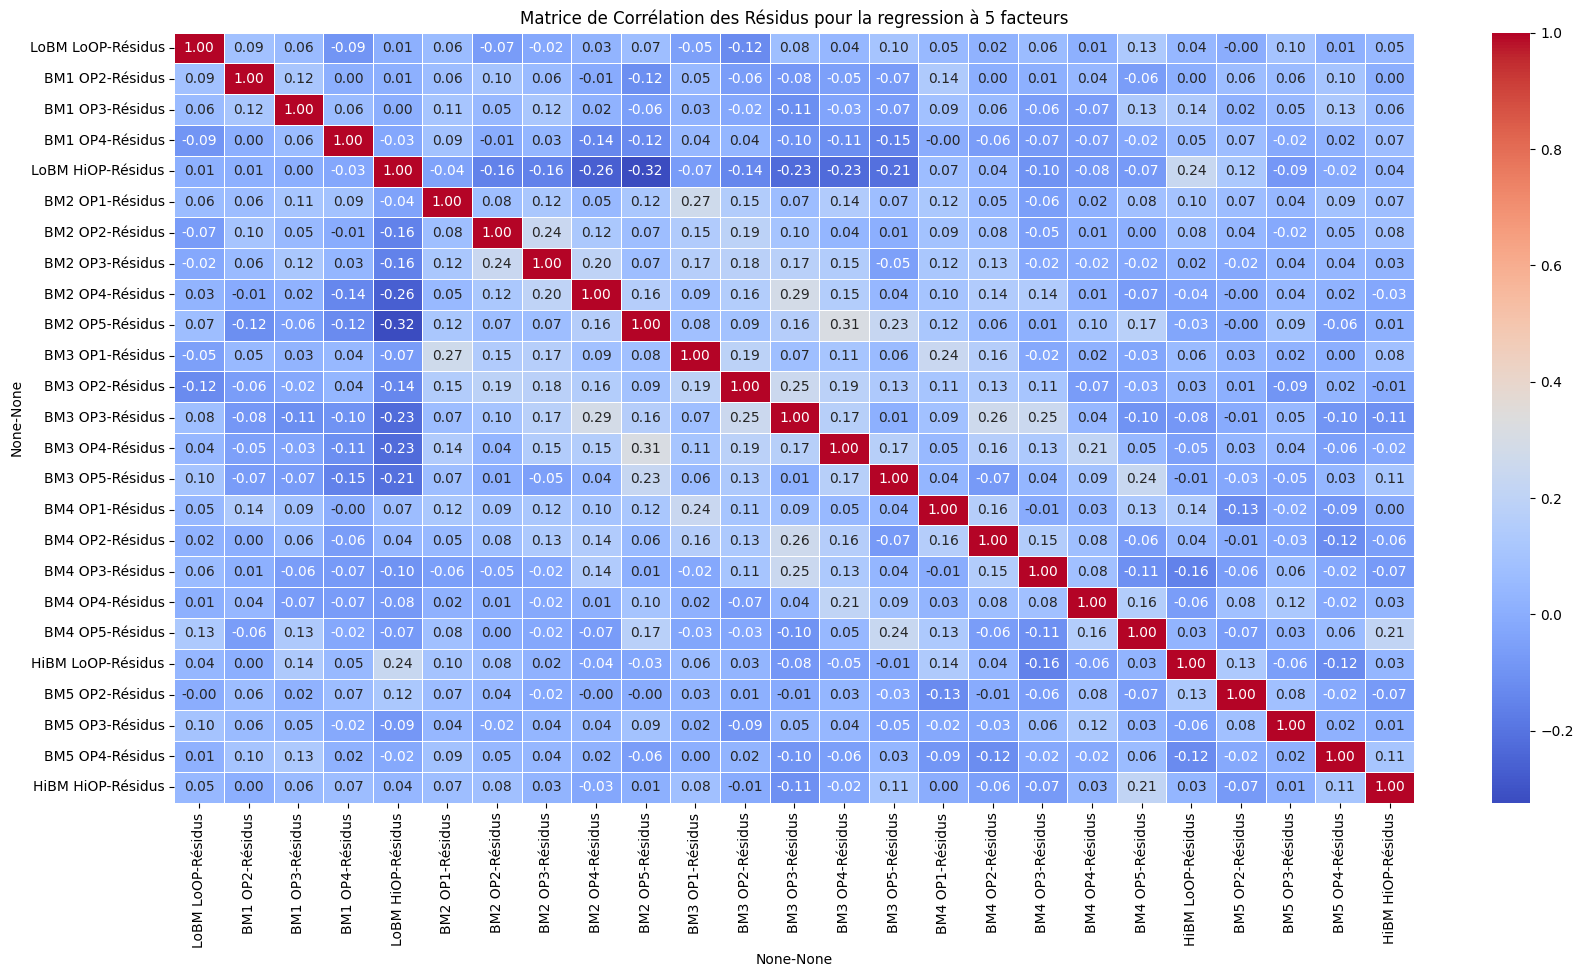

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# on crée un DataFrame pour stocker les résidus de tous les portefeuilles
tous_les_residus_df = pd.concat(residus_par_colonne3.values(), axis=1, keys=residus_par_colonne3.keys())


#on calcule la corrélation entre les résidus
correlation_residus = tous_les_residus_df.corr()

# on affiche la matrice
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_residus, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matrice de Corrélation des Résidus pour la regression à 5 facteurs")
plt.show()


Les corrélation des résidus semblent beacoup plus faible sur les modèles à 3 et 5 facteurs que sur le modèle initiale. Cela suggère que le modèle avec facteurs améliore la précisions du modèle. Cependant nous ne pouvons toujours pas supposer que la corrélation des résidus est nul

###4. Affichez et commentez les moyennes des $\vert \alpha_{i} \vert$

In [51]:
print(f"\nMoyenne des coefficients alpha de la premiere regression : {moyenne_alpha1}")
print(f"\nMoyenne des coefficients alpha de la seconde regression : {moyenne_alpha2}")
print(f"\nMoyenne des coefficients alpha de la troisieme regression : {moyenne_alpha3}")


Moyenne des coefficients alpha de la premiere regression : 0.16145340440473635

Moyenne des coefficients alpha de la seconde regression : 0.2714953508078554

Moyenne des coefficients alpha de la troisieme regression : 0.278045330960142


On retrouve le resultats contre-intuitif qui montre que le alpha augmente à mesure qu'on ajoute des facteurs explicatifs. La conclusion serait donc que les modèle à plusieurs facteurs ont un pouvoir explicatif plus faible.

# IV. GRS test (Gibbon, Ross and Shanken (1989)) of frontier efficiency

Le test GRS vérifient si les constantes des régressions des rendements sur les facteurs sont simultanément nulles. L'hypothèse nulle du test GRS est :
$$
H_{0} : \alpha_{i}=0, \forall i=1,...,N
$$

On note :
    
- $\hat{\alpha}= (\hat{\alpha}_{1},\hat{\alpha}_{2},...,\hat{\alpha}_{N} )'$ le vecteur colonne des N $\hat{\alpha}_{i}$
- $f_{t} = (f_{1t}, f_{2t},...,f_{kt})'$ le vecteur des *k* facteurs à la date *t*
- $\hat{e}_{t} = (\hat{e}_{1t},...,\hat{e}_{Nt})'$ le vecteur des N résidus à la date *t*
- $\bar{f} = \frac{1}{T}\sum_{t=1}^{T}f_{t}$ le vecteur des moyennes empiriques des facteurs
- $\hat{\Omega} = \frac{1}{T}\sum_{t=1}^{T}f_{t}f_{t}^{'} - \bar{f}\bar{f}^{'}$ la matrice de variance covariance des facteurs
- $\hat{\Sigma} = \frac{1}{T-k-1}\sum_{t=1}^{T}e_{t}e_{t}^{'} $
                                                       
La statistique du test de nullité simultanée des constantes est :

$$\hat{W}=\frac{T(T-N-k)}{N(T-k-1)}(1-\bar{f}^{'}\hat{\Omega}^{-1}\bar{f})\hat{\alpha}^{'}\hat{\Sigma}^{-1}\hat{\alpha}$$
                                    
Sous $H_{0}$ on a $\hat{W} \sim \mathcal{F}(N,T-N-k)$
                                    


### 1. Programmation et éxecution du test
Construire une fonction effectuant le test GRS et appliquez-là aux différents ensembles de facteurs (1, puis 3 puis 5 facteurs)

#### On commence par lister les données dont nous aurons besoin pour faciliter la mise en palce de la fonction

In [52]:
#vecteur colonne des alpha pour chaque regression
print(coefficients1) #regression1
print(coefficients2) #regression2
print(coefficients3) #regression3

[-0.6931970344773066, -0.21896494084099002, -0.23331385118888967, -0.17226018835118406, -0.08756565358579255, -0.4789094039546047, -0.2726792592271069, -0.16284603412373594, -0.1377541413997356, -0.1266969541036257, -0.49534767685640246, -0.22965732273777587, -0.15983189923960353, 0.013465208384054524, 0.03173769232869778, -0.31582686567546614, -0.22944525124265577, -0.02818204266264366, -0.10410364575691301, 0.07323849460688574, -0.14087282893215866, -0.06207605347202966, 0.06859878443516734, 0.1442008124526358, -0.0180450544972287]
[-0.45538747722635714, -0.05391427590631975, -0.05260439134649163, -0.025700198547922, 0.010172469794949422, -0.4458623097615807, -0.2589362630823482, -0.19305798357750473, -0.18618472246268367, -0.2196902098356558, -0.5791065490284184, -0.31042660277328765, -0.28853867133265126, -0.15143615784997358, -0.12343110328162328, -0.48974828180554314, -0.4502918983990386, -0.29359780324915863, -0.3465343949645047, -0.2137727340034681, -0.4281415127871632, -0.3824

In [53]:
#Vecteurs des k facteurs
Kfacteurs = data.iloc[:723]
colonnes = ['Mkt-RF', 'SMB', 'HML','RMW','CMA']
vecteursK = Kfacteurs[colonnes].values


In [54]:
#Vecteurs des residus pour chaque regression

#regression 1
# on cree un df vide pour stocker le résultat final
dfDates1 = pd.DataFrame(columns=['date'])

# on fusionne les df de résidus pour tous les portefeuilles en fonction de la colonne date
for portefeuille, df_residus in residus_par_colonne1.items():
    dfDates1 = pd.merge(dfDates1, df_residus, on='date', how='outer',suffixes=('', f'_{portefeuille}'))

# on met les dates en indice
dfDates1.set_index('date', inplace=True)

# on stocke nos valeurs dans une liste de vecteurs
vecteurs_residus1 = dfDates1.values


#regression 2 : nous faisons le meme processus
dfDates2 = pd.DataFrame(columns=['date'])

for portefeuille, df_residus in residus_par_colonne2.items():
    dfDates2 = pd.merge(dfDates2, df_residus, on='date', how='outer',suffixes=('', f'_{portefeuille}'))

dfDates2.set_index('date', inplace=True)
vecteurs_residus2 = dfDates2.values

#regression 3 : nous faisons le meme processus
dfDates3 = pd.DataFrame(columns=['date'])

for portefeuille, df_residus in residus_par_colonne3.items():
    dfDates3 = pd.merge(dfDates3, df_residus, on='date', how='outer',suffixes=('', f'_{portefeuille}'))

dfDates3.set_index('date', inplace=True)

vecteurs_residus3 = dfDates3.values


#### On peut appliquer la fonction

In [58]:
import numpy as np
import scipy.stats as stats

def grs_test(alpha, factor_returns, residuals, k):

    # on convertie les listes que nous avons crée en tableaux NumPy pour faciliter le processus
    if isinstance(alpha, list):
        alpha = np.array(alpha)
    if isinstance(factor_returns, list):
        factor_returns = np.array(factor_returns)
    if isinstance(residuals, list):
        residuals = np.array(residuals)

    T = residuals.shape[0] #on sait que le nombre d'observations correspond au nombre de résidus
    N = alpha.shape[0] # on sait que le nombre de portefeuilles est la longueur du vecteur alpha

    f_bar = np.mean(factor_returns, axis=0) #rendements moyens des facteurs
    Sigma_f_inv = np.linalg.inv(np.cov(factor_returns.T)) #matrice de covariance des facteurs
    Sigma_res = np.cov(residuals.T) #matrice de covariance des résidus

    #on calcule la statistique GRS
    alpha = alpha.reshape(-1, 1)  # s'assurer que alpha est un vecteur colonne
    f_bar = f_bar.reshape(-1, 1)  # s'assurer que f_bar est un vecteur colonne
    GRS_stat = (T/N) * (T-N-k) / (T-k-1) * (alpha.T @ np.linalg.inv(Sigma_res) @ alpha) * (1 - f_bar.T @ Sigma_f_inv @ f_bar)

    # on calcule la valeur p à partir de la distribution F
    p_value = 1 - stats.f.cdf(GRS_stat, N, T-N-k)

    #on conclue
    if p_value < 0.05:
        interpretation = "ce qui indique un rejet de l'hypothèse nulle à un niveau de signification de 5%."
    else:
        interpretation = "ce qui n'indique pas de rejet de l'hypothèse nulle à un niveau de signification de 5%."

    print(f"Avec {k} facteur(s), la statistique du test GRS est de {GRS_stat} "
          f"et la valeur p est de {p_value}, {interpretation}")


### 2. Commentaires des résultats des tests
Indiquez les réponses du test pour chacun des trois ensembles de facteurs. Existe-t-il un ensemble de facteurs pour lequel les $\alpha_{i}$ sont tous simultanément égaux à 0 ?

In [59]:
#on réalise le test pour chaque régression
grs_test(coefficients1, vecteursK, vecteurs_residus1, 1)

grs_test(coefficients2, vecteursK, vecteurs_residus2, 3)

grs_test(coefficients3, vecteursK, vecteurs_residus3, 5)

Avec 1 facteur(s), la statistique du test GRS est de [[3.91982246]] et la valeur p est de [[8.59564753e-10]], ce qui indique un rejet de l'hypothèse nulle à un niveau de signification de 5%.
Avec 3 facteur(s), la statistique du test GRS est de [[6.9500625]] et la valeur p est de [[1.11022302e-16]], ce qui indique un rejet de l'hypothèse nulle à un niveau de signification de 5%.
Avec 5 facteur(s), la statistique du test GRS est de [[8.21344127]] et la valeur p est de [[1.11022302e-16]], ce qui indique un rejet de l'hypothèse nulle à un niveau de signification de 5%.


Il n'existe pas de facteur pour lequel les $\alpha_{i}$ sont tous égaux à 0.